In [79]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

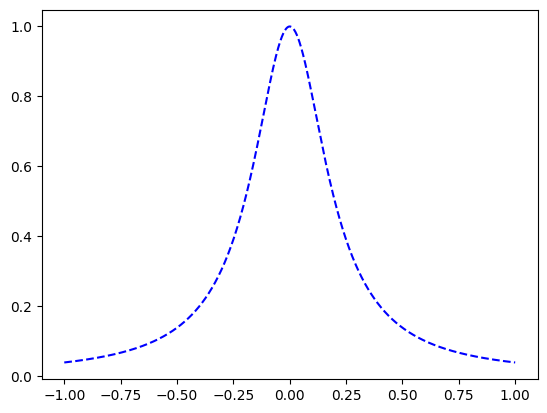

In [80]:
f = lambda x: 1/(1+25*x**2)
n = [4,8,12,16,20]
x_val = np.linspace(-1,1,1000)
plt.plot(x_val,f(x_val),"b--")

In [81]:
N = 4
n = N + 1
x_ = np.linspace(-1,1,n) #Puntos a interpolar
PL = lagrange(x_,f(x_)) #Función de interpolación
xL = np.linspace(np.min(x_), np.max(x_))

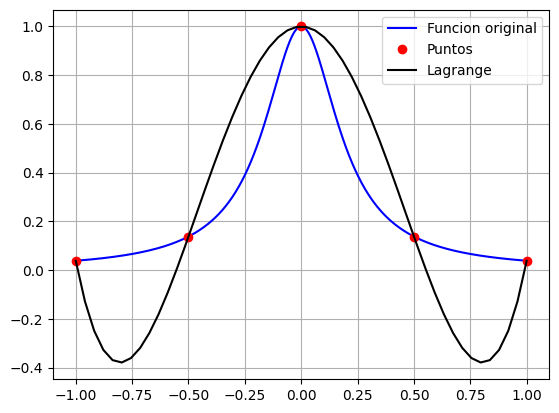

In [82]:
plt.plot(x_val,f(x_val),"b-", label = "Funcion original")
plt.plot(x_,f(x_), "ro", label = "Puntos")
plt.plot(xL, PL(xL), "k-", label = "Lagrange")
plt.legend()
plt.grid(True)

In [83]:
sp.init_printing()

f_s = lambda y: 1/(1+25*y**2)
y = sp.symbols("y")
df5 = sp.diff(f_s(y),y,5)
f5 = sp.lambdify(y,df5,"numpy")
f5(y)

          ⎛           4            2     ⎞
          ⎜    10000⋅y        400⋅y      ⎟
3750000⋅y⋅⎜- ──────────── + ───────── - 3⎟
          ⎜             2       2        ⎟
          ⎜  ⎛    2    ⎞    25⋅y  + 1    ⎟
          ⎝  ⎝25⋅y  + 1⎠                 ⎠
──────────────────────────────────────────
                          4               
               ⎛    2    ⎞                
               ⎝25⋅y  + 1⎠                

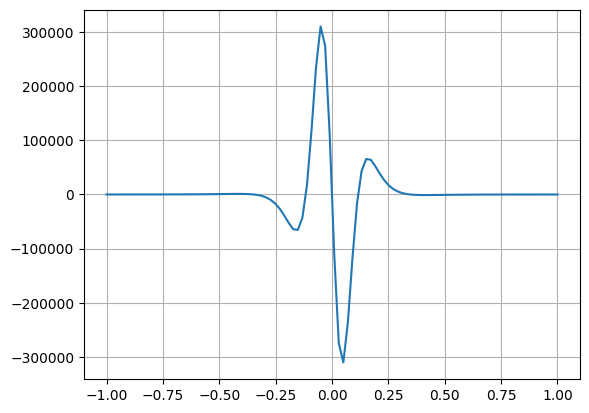

47
-0.050505050505050386


In [84]:
x5 = np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
plt.grid(True)
plt.show()
x_max = np.max(abs(f5(x5)))
x_zeta = np.argmax(abs(f5(x5)))
print(x_zeta)
print(x5[x_zeta])

In [85]:
import math as mt

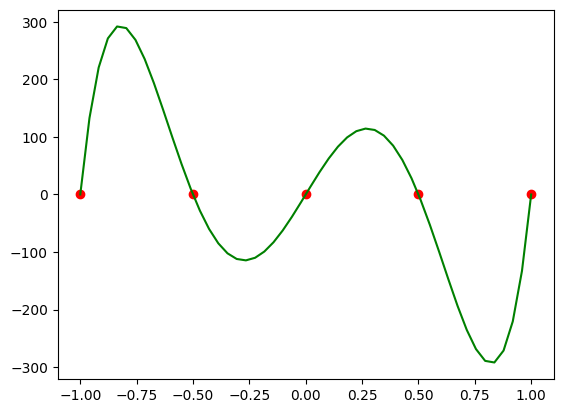

In [86]:
plt.plot(x_,f(x_),"ro")
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), "g-")

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados. Encontar también la función de error

In [87]:
f = lambda x: np.tan(x)
x_inter = np.linspace(-np.pi/4, np.pi/4,1000)
N = 9
n = N+1
x_val = np.linspace(-np.pi/4, np.pi/4,n)
PL = lagrange(x_val,f(x_val))
xL = np.linspace(np.min(x_val), np.max(x_val))

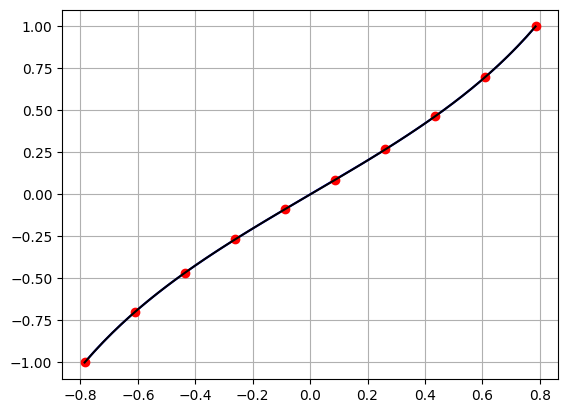

In [88]:
plt.plot(x_inter, f(x_inter),"b-") #Función orginal
plt.plot(x_val, f(x_val),"ro") #Puntos a interpolar
plt.plot(xL,PL(xL), "k-")
plt.grid(True)

In [89]:
sp.init_printing()

f_a = lambda y: sp.tan(y)
y = sp.symbols("y")
df10 = sp.diff(f_a(y),y,10)
f10 = sp.lambdify(y,df10,"numpy")

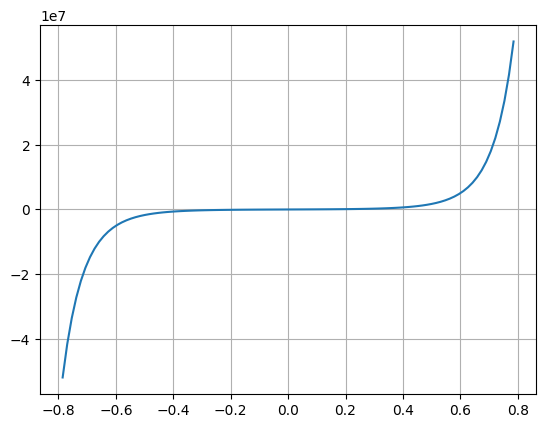

0
-0.7853981633974483


In [90]:
x10 = np.linspace(-np.pi/4,np.pi/4,100)
plt.plot(x10,f10(x10))
plt.grid(True)
plt.show()
x_max = np.max(abs(f10(x10)))
x_zeta = np.argmax(abs(f10(x10)))
print(x_zeta)
print(x10[x_zeta])

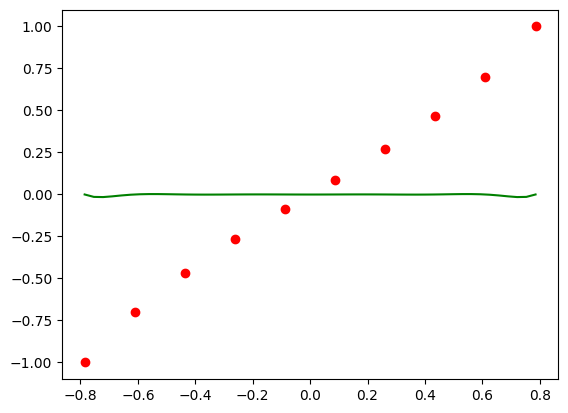

In [91]:
plt.plot(x_val,f(x_val),"ro")
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_val[0])*(xL-x_val[1])*(xL-x_val[2])*(xL-x_val[3])*(xL-x_val[4])*(xL-x_val[5])*(xL-x_val[6])*(xL-x_val[7])*(xL-x_val[8])*(xL-x_val[9]), "g-")

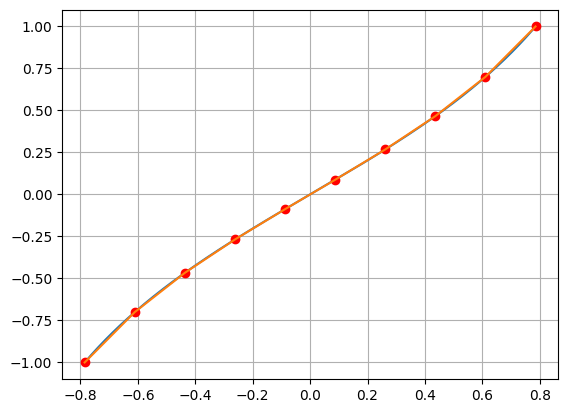

In [92]:
cs = CubicSpline(x_val, f(x_val))
plt.plot(x_inter, f(x_inter))
plt.plot(x_val,f(x_val),"ro")
plt.plot(x_val, cs(x_val))
plt.grid(True)

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


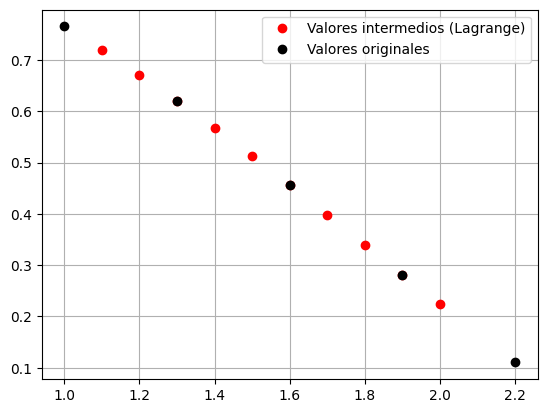

In [93]:
import pandas as pd
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
dicc = {"x":x, "fx":fx}
df = pd.DataFrame(dicc)
PL = lagrange(x,fx)
new_x_range = np.arange(1.1, 2.1, 0.1)
new_fx_range = PL(new_x_range)
dicc_lagrange = {"new_x_range":new_x_range, "new_fx_range":new_x_range}

###############################

plt.figure()
plt.plot(new_x_range, new_fx_range, "ro", label="Valores intermedios (Lagrange)")
plt.plot(x,fx, "ko", label="Valores originales")
plt.legend()
plt.grid(True)
plt.show()

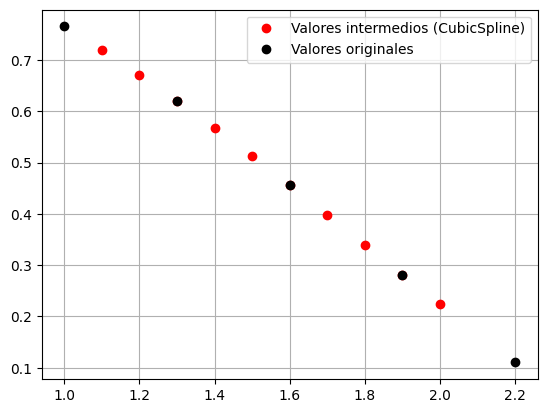

In [94]:
plt.figure()
cs = CubicSpline(x,fx)
new_fx_range1 = cs(new_x_range)
plt.plot(new_x_range,new_fx_range1,"ro", label="Valores intermedios (CubicSpline)")
plt.plot(x,fx,"ko", label="Valores originales")
plt.legend()
plt.grid(True)
plt.show()

No veo ningún tipo de diferencia. Supongo que es por el comportamiento lineal de los puntos

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [95]:
x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]
x1 = np.linspace(0.9,13.3,100)

In [96]:
PL = lagrange(x,y)
cs = CubicSpline(x,y)

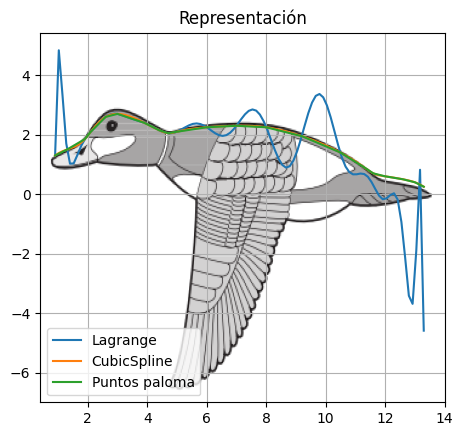

In [97]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato
plt.figure()
plt.title("Representación")
plt.imshow(imagen_pato,extent=(0.4,14,-7.0,3.45))
plt.plot(x1,PL(x1), label="Lagrange")
plt.plot(x1,cs(x1), label="CubicSpline")
plt.plot(x,y, label="Puntos paloma")
plt.legend()
plt.grid(True)
plt.show()

La interpolación lineal (CubicSpline) se muestra mas acertada con lo que debe ser la silueta de la paloma. Por otro lado la interpolación de Lagrange, nos deja ver algunas oscilaciones. Se deben al "fenómeno de Runge". Esto ocurre cuando intentamos ajustar una función con un polinomio de alto grado usando puntos equidistantes. Conforme aumenta el grado del polinomio, las oscilaciones entre los puntos pueden volverse más notorias. Esto sucede porque los polinomios de grado alto tienden a ajustarse demasiado a los puntos de datos, provocando oscilaciones excesivas.